In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tkinter import filedialog
from icecream import ic
from PIL import Image
import numpy as np

# Image selection

In [15]:
filePath = filedialog.askopenfilename(filetypes=[("Image Files", "*.png;*.jpg;*.jpeg;")])
image = Image.open(filePath)
image = image.convert('RGB')

# Image vectorization

In [16]:
pixels = np.array(image)
pixels = pixels.reshape(-1, 3)

# Classifying colors

In [17]:
nColors = 10
kmeans = KMeans(n_clusters=nColors, random_state=42).fit(pixels)
colors = kmeans.cluster_centers_.astype(int)

# Converting colors to hex code

In [18]:
hexColors = [f'#{c[0]:02x}{c[1]:02x}{c[2]:02x}' for c in colors]

In [19]:
for hexColor in hexColors:
    ic(hexColor)

ic| hexColor: '#2f2b32'
ic| hexColor: '#d17e26'
ic| hexColor: '#af846a'
ic| hexColor: '#90513b'
ic| hexColor: '#e8c2a1'
ic| hexColor: '#251b24'
ic| hexColor: '#632622'
ic| hexColor: '#77626a'
ic| hexColor: '#453c45'
ic| hexColor: '#5a4855'


# Visualizing colors

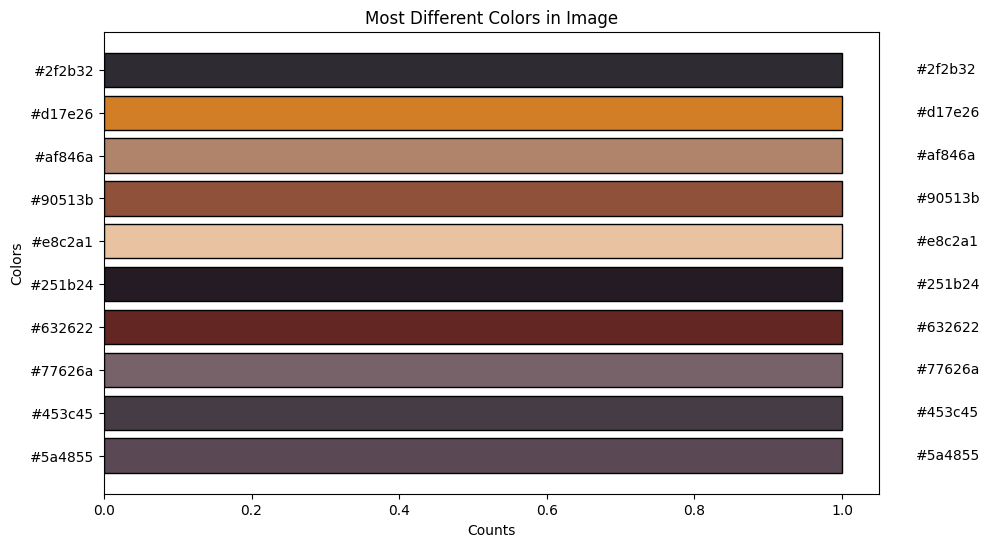

In [20]:
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(hexColors)), [1] * len(hexColors), color=hexColors, edgecolor='black')


for bar, hexColor in zip(bars, hexColors):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, hexColor, va='center', fontsize=10)

plt.ylabel('Colors')
plt.xlabel('Counts')
plt.title('Most Different Colors in Image')
plt.yticks(range(len(hexColors)), hexColors)
plt.gca().invert_yaxis() 
plt.show()